

We are solving 1d heat equation with no volumetric heat source and with the diffusivity equal to 1:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial t^2}
$$

Boundary conditions and the initial condition are:

$$
u(0,t) = u_0
$$

$$
u(1,t) = 0
$$

$$
u(x, 0) = u_0
$$

We have inhomogenous boundary conditions, therefore, we have to perform change of variables:

$$
v(x,t) = u(x,t) - u_e(x)
$$

And solve for:

$$
\frac{\partial v}{\partial t} = \frac{\partial^2 v}{\partial x^2}
$$

$$
v(0,t) = 0
$$

$$
v(1,t) = 0
$$

$$
v(x, 0) = u_0 -u_e(x)
$$

where $u_e$ is the equalibrium temperature:

$$
\displaystyle
\lim_{t\to\infty} u(x,t) = u_e(x) = u_0(1-x)
$$

Using a method of separtion of variables we get to the general solution:

$$
\displaystyle
v(x,t) = \sum_{n=1}^\infty B_n \sin(n\pi x) e^{-n^2\pi^2t} 
$$

$$
B_n = \int_{0}^1 \sin(n\pi x) v(x,0) dx = - \frac{2u_0}{n\pi} (-1)^n
$$

Giving the final solution:

$$
u(x,t) = v(x,t) + u_e(x) = v(x,t) + u_0(1-x)
$$

$$
\displaystyle
u(x,t) = -\frac{2u_0}{\pi} \sum_{n=1}^\infty \frac{(-1)^n}{n} sin(n\pi x) e^{-n^2 \pi^2 t} + u_0(1-x)
$$

Taking the first dominant term in the series we have the analytic solution to the PDE:

$$
u(x,t) = \frac{2u_0}{\pi} sin(\pi x) e^{-\pi^2 t}+ u_0(1-x)
$$

for time condition: 

$$
t \geq \frac{1}{\pi^2}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

from mpl_toolkits.mplot3d import Axes3D # you need this for 3d plotting, otherwise the projection='3D' wont work

Set the lists and define temperature at right boundary

In [2]:
u0 = 5
I = 101    # I suggest parameterised
Lx = 1
end_time = 1

u = np.empty( (I,I) )

x_list = np.linspace(0, Lx, I, dtype='double')
t_list = np.linspace(0, end_time, I, dtype='double')
dt = t_list[-1]/(len(t_list)-1)

Define the function

In [3]:
@jit
def eval_analytic_1d(u):
    for n in prange(0, u.shape[0]):
        for i in prange(0, u.shape[1]):
            u[n,i] = u0 * (1-x_list[i]) + (2*u0/np.pi) * np.sin(np.pi*x_list[i]) * np.exp(-np.pi**2 * t_list[n])
    return u

eval_analytic_1d(u);

# 2D and contour plot
Note: time must satisfy condition: t >= 1/pi^2 for reasons left as an exercise for the reader  

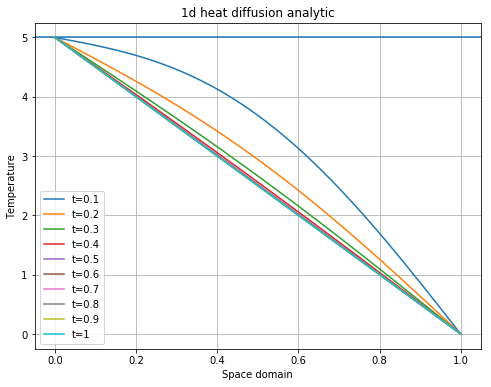

In [4]:
# graph
plt.figure(figsize=(8,6))
num_of_slice = 10
plt.axhline(y=5)
for i in range(10, len(u), len(u)//num_of_slice ):
    plt.plot(x_list, u[i], label=f't={i*dt :.1g}')

plt.title('1d heat diffusion analytic')
plt.xlabel('Space domain')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid(True)
plt.show()

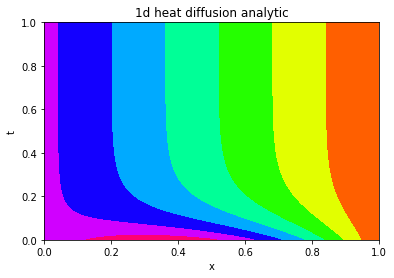

In [5]:
# the repeated declare is to prevent the meshgrid doing it on top of the previous meshgrid
x_list = np.linspace(0, Lx, I, dtype='double')
t_list = np.linspace(0, end_time, int(end_time/dt)+1, dtype='double')

# contour plot
plt.contourf(x_list, t_list, u, cmap='hsv')
plt.xlabel('x')
plt.ylabel('t')
plt.title('1d heat diffusion analytic')
plt.show()

# 3D plots

In [6]:
# interactive 3d plots, so that you can move around and enjoy in different angles
%matplotlib notebook

# the repeated declare is to prevent the meshgrid doing it on top of the previous meshgrid
x_list = np.linspace(0, Lx, I, dtype='double')
t_list = np.linspace(0, end_time, int(end_time/dt)+1, dtype='double')
x_list, t_list = np.meshgrid(x_list, t_list)
print(f'size of t_list: {t_list.shape}, size of x_list: {x_list.shape}, size of u: {u.shape}')

size of t_list: (101, 101), size of x_list: (101, 101), size of u: (101, 101)


<IPython.core.display.Javascript object>


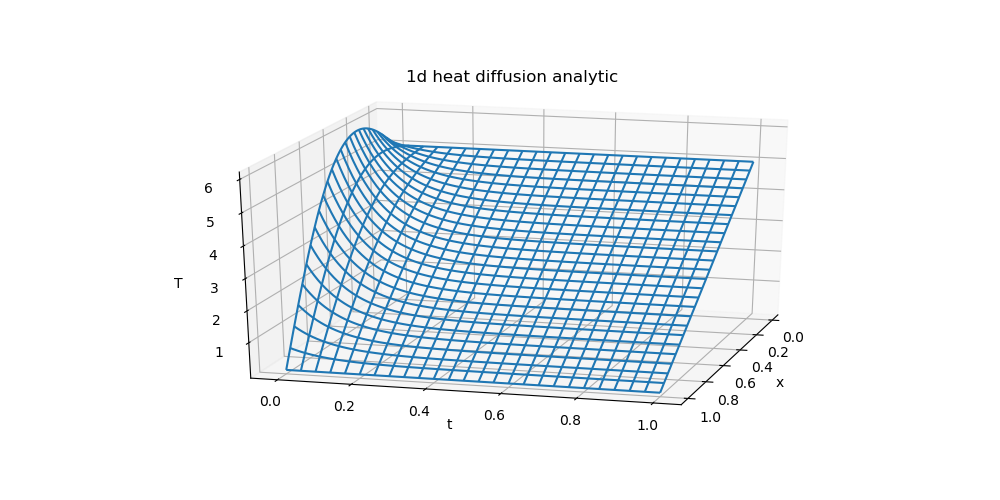

In [7]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

ax.plot_wireframe(x_list, t_list, u, rcount=30, ccount=30)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.set_title('1d heat diffusion analytic')
plt.show()

<IPython.core.display.Javascript object>


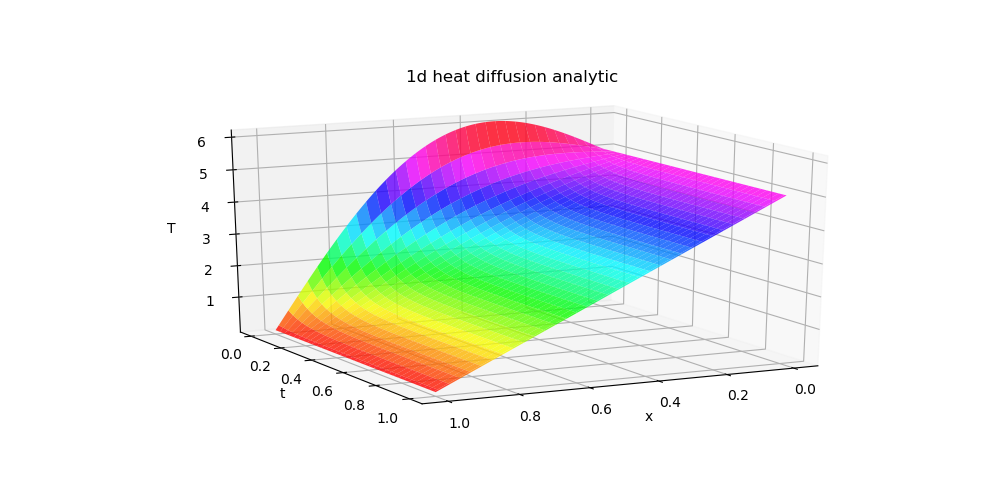

In [8]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca(projection='3d')

ax.plot_surface(x_list, t_list, u, shade=True,\
                cmap='hsv', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('T')
ax.set_title('1d heat diffusion analytic')
plt.show()